In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report
from keras.utils import np_utils
import warnings
warnings.filterwarnings("ignore") #this is to ignore warnings generated by code

In [3]:
path = "train.csv"
mnist = pd.read_csv(path)

In [4]:
mnist

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3432,5,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3433,5,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3434,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3435,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
mnist.shape

(3437, 785)

In [6]:
mnist.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
mnist.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
3432,5,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3433,5,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3434,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3435,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3436,5,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
mnist.describe()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,3437.000000,3437.0,3437.0,3437.0,3437.0,3437.0,3437.0,3437.0,3437.0,3437.0,...,3436.000000,3436.000000,3436.000000,3436.0,3436.0,3436.0,3436.0,3436.0,3436.0,3436.0
mean,4.416933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.238359,0.187427,0.011641,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.889784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.827971,6.124029,0.482453,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,252.000000,20.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
X, y = mnist.drop(["label"], axis = 1), mnist["label"]


In [22]:
y.unique()


array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

In [30]:
first_image = X.iloc[3]


<function matplotlib.pyplot.show(close=None, block=None)>

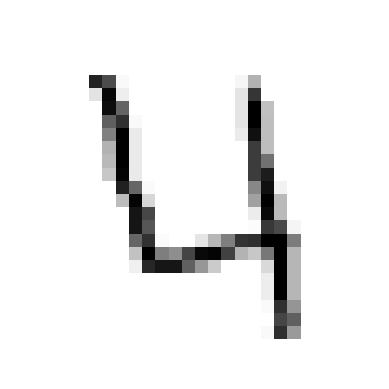

In [32]:
plt.imshow(first_image.to_numpy().reshape(28,28), cmap='binary')
plt.axis("off")
plt.show

In [33]:
X = X / 255


In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)


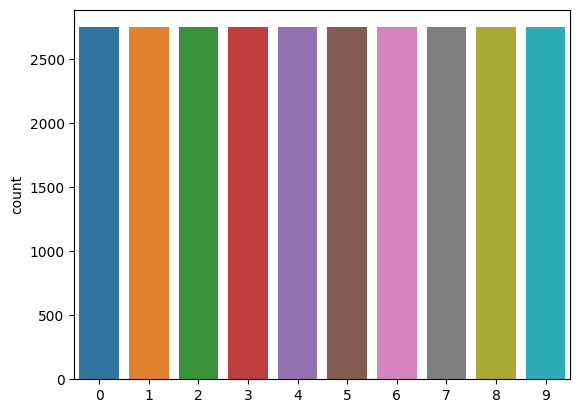

In [52]:
g = sns.countplot(y_train)


In [35]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [36]:
model = Sequential()
model.add(Dense(128, activation = "relu", input_shape =(784,)))
model.add(Dense(64, activation = "relu"))
model.add(Dense(10, activation ="softmax"))

In [37]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(loss="categorical_crossentropy",
              optimizer="Adam",
              metrics = ['accuracy'])

In [39]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)


In [40]:
model.fit(X_train, y_train, batch_size = 100, epochs = 10, validation_data = (X_test, y_test))


Epoch 1/10
28/28 [==============================] - 2s 47ms/step - loss: 1.4710 - accuracy: 0.6039 - val_loss: nan - val_accuracy: 0.8140
Epoch 2/10
28/28 [==============================] - 1s 43ms/step - loss: 0.5442 - accuracy: 0.8538 - val_loss: nan - val_accuracy: 0.8794
Epoch 3/10
28/28 [==============================] - 1s 40ms/step - loss: 0.3567 - accuracy: 0.9047 - val_loss: nan - val_accuracy: 0.8924
Epoch 4/10
28/28 [==============================] - 1s 45ms/step - loss: 0.2702 - accuracy: 0.9298 - val_loss: nan - val_accuracy: 0.9055
Epoch 5/10
28/28 [==============================] - 2s 54ms/step - loss: 0.2138 - accuracy: 0.9494 - val_loss: nan - val_accuracy: 0.9113
Epoch 6/10
28/28 [==============================] - 1s 47ms/step - loss: 0.1827 - accuracy: 0.9549 - val_loss: nan - val_accuracy: 0.9113
Epoch 7/10
28/28 [==============================] - 1s 40ms/step - loss: 0.1463 - accuracy: 0.9684 - val_loss: nan - val_accuracy: 0.9201
Epoch 8/10
28/28 [================

In [41]:
test_loss, test_acc = model.evaluate(X_test, y_test)


22/22 [==============================] - 0s 13ms/step - loss: nan - accuracy: 0.9201


In [42]:
print(test_acc)


0.9200581312179565


In [47]:
y_pred = model.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis = 1)


22/22 [==============================] - 0s 16ms/step


In [44]:
print(np.round(y_pred[0]))


[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [48]:
y_true = np.argmax(y_test, axis = 1)


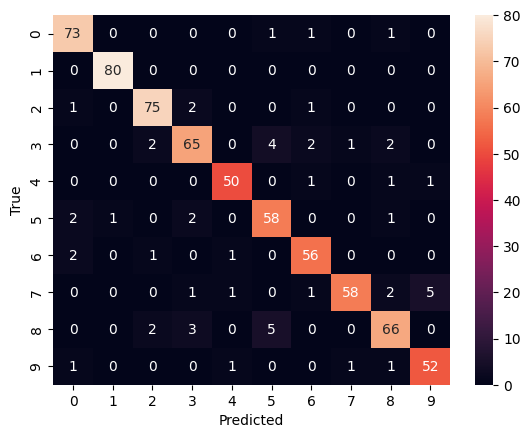

In [49]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(confusion, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [50]:
print(classification_report(y_true, y_pred_classes))


              precision    recall  f1-score   support

           0       0.92      0.96      0.94        76
           1       0.99      1.00      0.99        80
           2       0.94      0.95      0.94        79
           3       0.89      0.86      0.87        76
           4       0.94      0.94      0.94        53
           5       0.85      0.91      0.88        64
           6       0.90      0.93      0.92        60
           7       0.97      0.85      0.91        68
           8       0.89      0.87      0.88        76
           9       0.90      0.93      0.91        56

    accuracy                           0.92       688
   macro avg       0.92      0.92      0.92       688
weighted avg       0.92      0.92      0.92       688

